# Setup and Introduction to IllustrisTNG
## Autumn 2022 MPhys project
### James Bowman and Ethan Edwards
### Supervised by Carolin and Mathilda

IllustrisTNG is a state-of-the-art cosmological magnetohydrodynamical simulation widely used in the field for its predictions of galaxy properties. This includes testing the physical prescriptions input into the simulation as well as applications like using mock images for machine learning. 

The website for the project is https://www.tng-project.org.

### Working on noether
Hopefully soon you'll have logins and a dedicated directory on `py-noether`. You can access it via the command line with  
```
ssh <username>@py-noether.bath.ac.uk
```
You'll need the VPN to connect from off campus which is a bit of a faff--when it fails for me I find restarting my computer usually does the trick. If you have issues with setting up the VPN then Carolin (mac) or I (ubuntu) can try to help.

To run notebooks I usually connect to a different port because it's handy to have the 8888 port open on my computer, so I run  
```
ssh -L 9888:localhost:9888 <username>@py-noether.bath.ac.uk  
cd <working-directory>  
conda activate astroconda3  
jupyter notebook --no-browser --port 9888
```
Then copy and paste the link into the browser. Not adding the `--no-browser` option tries to open a browser on noether which does not work.

For editing scripts I use emacs (objectively the best but I think noether has a few options) and then you can run them in the command line. To run in the background and print the output to a logfile, what I do is put  
`#!/opt/anaconda3/envs/astroconda3/bin/python`  
as the top line of the script (points to the astroconda3 environment) and then run  
```
chmod +x <script-name>  
./<script-name> > <logfile-name> 2>&1 &
```

I think Carolin uses a slightly different setup for running and backgrounding stuff so feel free to ask her about it!

### Getting the hang of IllustrisTNG

#### Get a login
Fill in the form at https://www.tng-project.org/users/register/. It should go through quickly. You'll need this login and the associated API key to download new data. However, we have lots of data downloaded already...

#### Documentation
You don't need the login to read the documentation, so this could be a good thing to look at while waiting on it. It's under the `DATA ACCESS` tab on the website (second section on the left)
* "Background and Important Details" - general description of the simulation boxes and input physics
* "Data Specifications" - describes every single field in the data, very useful
* "Example Scripts" - more useful examples than I can come up with, and has Python, IDL, Matlab, and Julia (I only speak Python), see also the [GitHub](https://github.com/illustristng/)
* "Web-based API" - the most useful bit of this that I've found is the "reference for the web-based query interface" which helps a lot with using the visualiser

#### Useful papers
* data release paper: [Nelson et al (2018)](https://ui.adsabs.harvard.edu/abs/2019ComAC...6....2N/abstract), helpful for explaining some areas where the online documentation is a bit lacking
* paper describing the science: [Pillepich et al (2018)](https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.4077P/abstract)
* general review on cosmological simulations: [Somerville and Dave (2015)](https://ui.adsabs.harvard.edu/abs/2015ARA%26A..53...51S/abstract)

#### Data on noether
We have a bunch of TNG data already stored on the `x` drive. It lives at `/x/Physics/AstroPhysics/Shared-New/DATA/IllustrisTNG`. To look at the data, you'll need the `illustris_python` package, so run  
```
git clone https://github.com/illustristng/illustris_python.git
```
which will clone the repository into a subdirectory called `illustris_python`. I'll make a quick example of plotting a property of the galaxy population in the cell below.

6291349
4371211


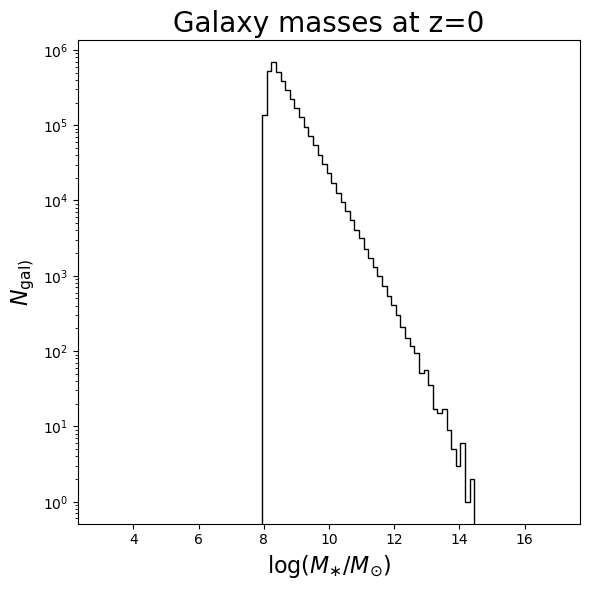

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# below line points to where illustris_python lives for me
# you will need to clone it somewhere you have read access
# can also add to your bashrc or bash_profile, ask Carolin how
sys.path.append('/u/e/jb2854/Mergers_Project')
from illustris_python import illustris_python as il
basePath = '/x/Physics/AstroPhysics/Shared-New/DATA/IllustrisTNG/TNG100-1/output'

# get the indices of the primary galaxies in each group, snapshot 99/z=0
groupFirstSub = il.groupcat.loadHalos(basePath,99,fields=['GroupFirstSub'])

# get masses plus flag saying whether galaxy should be trusted
# returns a dict with the specified keywords
subhalo_data = il.groupcat.loadSubhalos(basePath, 99, fields=['SubhaloFlag','SubhaloMassType'])
subhalo_flag = subhalo_data['SubhaloFlag']

# choose which galaxies to plot
good_cen_idx = np.intersect1d(groupFirstSub, np.where(subhalo_flag==1)[0]) # 'good' centrals
good_idx = subhalo_flag == 1                  # all 'good' galaxies, centrals and satellites

# stellar mass is in units of 1e10 MSun
# 'SubhaloMassType' is a 2D array storing the different particle types
subhalo_mstar = subhalo_data['SubhaloMassType'][good_cen_idx,il.util.partTypeNum('dm')]
subhalo_mstar = subhalo_mstar[subhalo_mstar > 0] # you'd think the flag would weed this out, but no
#print(np.min(subhalo_mstar))
subhalo_mstar = np.log10(subhalo_mstar)+10

# cheeky plot
fig = plt.figure(figsize=(6,6))
ax = fig.subplots(nrows=1, ncols=1)
ax.hist(subhalo_mstar, bins=np.linspace(3, 17, num=100), color='k', histtype='step')

ax.set_title('Galaxy masses at z=0', size=20)
ax.set_yscale('log')
ax.set_xlabel(r'$\log(M_{\ast}/M_{\odot})$', size=16)
ax.set_ylabel(r'$N_{\mathrm{gal})}$', size=16)
fig.tight_layout()

print(len(groupFirstSub))
print(len(subhalo_data['SubhaloFlag']))

### Stuff to do with the data:
* Try plotting some different galaxy properties and scaling relations from the group catalogue data. 
  * Examples:
    * reproduce galaxy mass function above
    * BH mass - stellar mass
    * stellar mass - halo mass
    * BH mass - velocity dispersion
    * gas fraction, SFR, etc... (snapshot 99 has cold gas mass as well as total in a special catalogue)
  * Which relations does it reproduce well, and which ones don't look the way you expect?
  * You can take a look at the [interactive plotting](https://www.tng-project.org/data/groupcat/) on the TNG 
    webpage and compare with the plots you make.
* If this is all super quick and easy, start looking at the merger trees. The 
  [example scripts](https://www.tng-project.org/data/docs/scripts/) are a good starting point.
  * Grab a merger tree. Try plotting the mass assembly history.
  * Try counting the mergers in the tree.
  * `illustris_python` has a function for calculating the maximum past mass for the mass ratio. How else might 
    you want to define mass ratio?

### GitHub!!!
I find GitHub (and Git in general) intensely frustrating but really really useful and we highly recommend using it to back up your work. If you're already a GitHub whiz then that's great and don't read any further, but if you're like me and get confused every time you try to set up a new repo then here is a guide that I wrote myself that puts together a few different guides I found online.

Again Carolin probably does it a slightly different way from me so feel free to ask her for help also :)

#### Initialising a repository
[GitHub tutorial](https://docs.github.com/en/get-started/importing-your-projects-to-github/importing-source-code-to-github/adding-locally-hosted-code-to-github)
1. Go to the directory where you want your repository.
2. Initialise:  
`git init` (note that `-b main` throws an error so I just let it be generic)
3. Stage files:  
`git add .` (will add everything, you can do files individually but better to make a [gitignore](https://git-scm.com/docs/gitignore))
4. Commit files:  
`git commit -m "first commit"`
5. Go to [GitHub](https://github.com) and create a new repository. Don't initialise anything on GitHub.
6. Copy the repository URL.
7. Add and verify the URL to the local repo:  
`git remote add origin <URL>`  
`git remote -v`
8. Push the files to remote:  
`git push origin master`

#### Adding a Personal Access Token
1. Go to [GitHub](https://github.com) and click your profile picture on the top right to find the link to settings.
2. Go to Developer Settings which is at the very bottom of the list on the left.
3. Go to Personal access tokens [quick link](https://github.com/settings/tokens).
4. Create a new token with the necessary permissions.

#### Saving the token on your computer
I got this information [here](https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage), although I couldn't figure out how to make it actually store the token, so here I describe how to do it manually.
1. Run the command  
`git config --global credential.helper 'store --file ~/.git-pat'` (or whatever you want to name the file)
This will add the lines
```
[credential]  
        helper = store --file ~/.git-pat
```
to your `~/.gitconfig` file--you can also update that manually.
2. This didn't actually store the token for me so I had to manually create `~/.git-pat` which has one line in the format  
`https://<username>:<token>@github.com`